## Part 1 기계지능
### CHAPTER 2 초지능

* 2.1절에서 인공지능 분야에서 성공한 예시들을 소개한다
* 2.2절에서는 최근의 성공 스토리에서 하드웨어가 가지는 중요성에 대해 논하고
* 2.3절에서는 협의의 인공지능, 광의의 인공지능, 초지능과 같은 다른 형태의 지능에 대해 소개한다
* 2.4절에서 사람의 뇌 전체를 흉내 내는 초지능에 이르는 잠재적인 경로에 대해 다루고
* 2.6절에서는 초지능에서 이른바 제어 문제와 관련된 면을 논의한다.
* 2.7절에서는 초지능을 달성했을때 미래의 잠재적인 결과와 시나리오를 간단하게 살펴본다.


---
<center><목차></center>
<center>2.1 성공스토리</center>
<center>2.2 하드웨어의 중요성</center>
<center>2.3 지능의 형태</center>
<center>2.4 초지능으로 가는길</center>
<center>2.5 지능의 폭발</center>
<center>2.6 목표와 제어</center>
<center>2.7 잠재적 결과</center>
<center>2.8 마치며</center>

### 2.1 성공스토리

#### 2.1.1 아타리

* 어떻게 딥마인드가 아타리 2600 게임을 강화 학습과 신경망으로 플레이할 수 있도록 <br>
    마스터했는지에 대한 성공 스토리를 소개.

* 딥마인드는 강화학습을 적용하여 인공지능 알고리즘으로 아타리 2600 게임들을 플레이하는 문제를 학습한 결과를 논문으로 출간
 
* 인공지능 관점에서 딥마인드 팀이 이러한 결과를 어떻게 얻었는지 중요
    * 첫째 : 딥마인드는 7개의 게임을 플레이하도록 학습하는데 단 하나의 신경망 사용
    * 둘째 : 인간의 지도나 인간이 라벨링한 데이터를 제공하지 않고 오로지 시각 데이터를 특징 데이터로 사용
    * 셋째 : 강화학습 사용, 에이전트의 행동과 그 결과의 관계만을 관찰하여 학습. 즉, 기본적으로 사람이 게임하는 과정과 완전히 동일 
    

* 딥마인드 인공지능이 인간전문가를 능가하는 성능을 올린 게임중의 하나가 벽돌깨기


* 벽돌게임 https://www.youtube.com/watch?v=L31ZN9K3j_A
    * 게임의 목표는 스크린 아래에 있는 수평 막대기를 이용하여 스크린 상하로 움직이는 공을 제어하고 스크린 위에 있는 여러줄의 벽돌을 파괴하는것

    * 예제에서 강화 학습의 행동 공간을 3가지 요소로 이루어짐
        * 현재 위치에 머물기
        * 왼쪽으로 움직이기
        * 오른쪽으로 움직이기
    * 상태공간은 128개 색상 팔레트의 210 x 160 픽셀 게임 스크린 프레임으로 나타남 




####  예제  (그림..)
* 이 예제는 수평 막대기를 왼쪽과 오른쪽으로 움직여 수평 막대기 위에 놓은 수직 막대(pole)의 균형을 잘 잡아야 한다.

* 물리적 데이터 4개로 이루어져 있음
    * 수평 막대기의 위치, 속도, 수직 막대기의 각도 및 각속도 

* 행동이 이루어지고 수직 막대기가 균형을 잡으면 에이전트는 1이라는 보상치를 얻는다. 수직 막대기가 쓰러지면 게임은 끝난다.

* 에이전트가 200이라는 전체 보상치에 도달하면 성공한것으로 본다. 

In [12]:
import gym
import numpy as np
import pandas as pd
np.random.seed(100)

env = gym.make('CartPole-v0') # 환경 객체 초기화
# env.seed(100) # 환경의 무작위 생성 시드값 고정 # AttributeError: 'CartPoleEnv' object has no attribute 'seed' 

action_size = env.action_space.n
action_size # 행동 공간의 크기 

[env.action_space.sample() for _ in range(10)] # 무작위ㅣ 행동을 선택하고 저장 

state_size = env.observation_space.shape[0] 
state_size # 상태 공간의 크기 

state = env.reset() # 환경을 초기화하고 상태를 캡처
state

state, reward, done, trunc, _ = env.step(env.action_space.sample()) # 무작위 행동을 취하고 환경을 다음 상태로 넘기기 
state, reward, done, trunc, _

c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(array([ 0.00539169, -0.162555  , -0.02788766,  0.28651336], dtype=float32),
 1.0,
 False,
 False,
 {})

* 환경 객체를 초기화하고 행동공간과 상태공간을 조사
* 그리고 무작위 행동을 취한 다음에 그 결과를 캡쳐
* 종료변수가 False 값이면 인공지능 에이전트는 다음 라운드로 넘어감.

* 다음단계는 무작위 행동에 기반하여 게임을 플레이함으로써 충분히 큰 데이터를 생성.
* 하지만 데이터의 질을 향상시키기 위해 전체 보상이 110이 넘는 게임에서만 데이터를 모은다
* 신경망을 학습시킬만한 충분한 데이터를 모으기 위해서는 수천번의 게임을 반복해야함. 

In [13]:
%%time
data = pd.DataFrame()
state = env.reset()
length = []
for run in range(25000):
    done = False
    prev_state = env.reset()[0]
    treward = 1
    results = []
    while not done:
        action = env.action_space.sample()
        state, reward, done, trunc, _ = env.step(action)
        results.append({'s1': prev_state[0], 's2': prev_state[1],
                        's3': prev_state[2], 's4': prev_state[3],
                        'a': action, 'r': reward})
        treward += reward if not done else 0
        prev_state = state
    if treward >= 110: # 무작위 에이전트의 전체 보상치가 최소 100이상만 선택 
        data = pd.concat((data, pd.DataFrame(results))) # 데이터 수집
        length.append(treward) # 전체 보상치 기록

CPU times: total: 1.61 s
Wall time: 4.66 s


In [14]:
np.array(length).mean() # 무작위 게임의 전체 보상치의 평균값 계산

122.57142857142857

In [15]:
data.info() # DataFrame 객체에 수집된 데이터 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 858 entries, 0 to 136
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      858 non-null    float32
 1   s2      858 non-null    float32
 2   s3      858 non-null    float32
 3   s4      858 non-null    float32
 4   a       858 non-null    int64  
 5   r       858 non-null    float64
dtypes: float32(4), float64(1), int64(1)
memory usage: 33.5 KB


In [16]:
data.tail()

,s1,s2,s3,s4,a,r
132,-1.680000,-1.882583,0.061508,1.277154,0,1.0
133,-1.717652,-2.078433,0.087051,1.588445,0,1.0
134,-1.759220,-2.274475,0.118820,1.906955,1,1.0
135,-1.804710,-2.080819,0.156959,1.653371,0,1.0
136,-1.846326,-2.277387,0.190027,1.990555,0,1.0


* 이 데이터를 가지고 신경망을 다음과 같이 학습시킬 수 있다.
    * 분류 문제를 위한 신경망을 초기화
    * 상태 데이터를 특징 데이터로 하고 행동 데이터를 라벨 데이터로 하여 신경망을 학습
    * 주어진 상태에 대해 성공적인 행동을 취한 데이터만 있기 떄문에 신경망은 주어진 상태(특징)에 대해 학습할 수 있게됨. 

In [17]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

import  tensorflow as tf
from tensorflow import keras
tf.random.set_seed(100)

from keras.layers import Dense
from keras.models import Sequential


model = Sequential()
model.add(Dense(64, activation='relu',   # 은닉층이 하나인 신경망 사용
                input_dim=env.observation_space.shape[0]))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

C:\Users\gjm10\AppData\Local\Temp\ipykernel_11488\3370371862.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [18]:
%%time
model.fit(data[['s1', 's2', 's3', 's4']], data['a'],
          epochs=25, verbose=False, validation_split=0.2) # 앞서 수집한 데이터에 기반한 모델 학습 

res = pd.DataFrame(model.history.history) # 마지막 단계에서 훈련 단계의 수치 보여주기 
res.tail(3)

CPU times: total: 766 ms
Wall time: 2.27 s


,loss,acc,val_loss,val_acc
22,0.634187,0.628280,0.661567,0.639535
23,0.633209,0.631195,0.665899,0.656977
24,0.633171,0.626822,0.663853,0.651163


<AxesSubplot: >

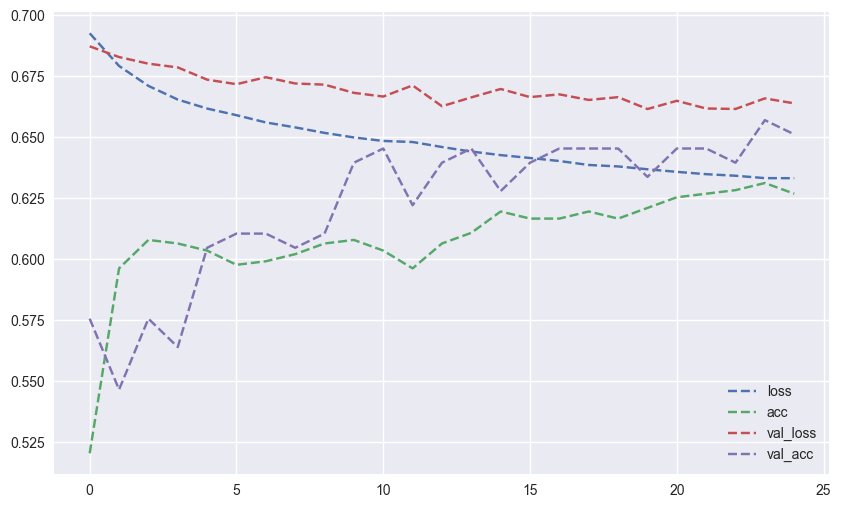

In [19]:
# 시각화 
res.plot(figsize=(10, 6), style='--')

* 훈련된 신경망, 즉 인공지능 에이전트는 각 상태에서 최선의 행동을 학습한대로 CartPole 게임을 플레이할 수 있게됨.
* 인공지능 에이전트는 게임 100~200개의 최대 보상치를 얻음.

In [20]:
def epoch():
    print('|', end='')
    done = False
    state = env.reset()[0]
    trunc = False
    treward = 0
    while not done and not trunc:
        action = np.where(model.predict(np.atleast_2d(state))[0][0] > 0.5, 1, 0) # 주어진 모델과 상태에 따른 행동 선택 
        state, reward, done, trunc, _ = env.step(action) # 학습된 행동에 기반하여 한 스텝 앞으로 전진 
        treward += reward if not done else 0
    return treward



In [21]:
%%time
res = np.array([epoch() for _ in range(100)])
print()
res

1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 24ms/step


KeyboardInterrupt: 

In [ ]:
res.mean() # 전체 게임의 보상치의 평균값 계산 

200.0

### 2.1.2 바둑 

* 알파고가 이세돌을 이겼다... (딥마인드에 의해 만들어진 알파고)
* 인간 전문가 이상의 성능을 거둔 인공지능이 탄생. 

### 2.1.3 체스 

* 알파제로의 등장. 알파제로의 방법론은 여러가지 버전의 인공지능 에이전트가 서로 경쟁하게 만드는 <br>
자기 학습과 강화 학습만을 사용하여 체스 게임을 마스터


### 2.2 하드웨어의 중요성 

* 하드웨어 분야의 진보가 없었다면 최근의 인공지능의 성능은 불가능
* 알파고의 실력이 증가하면서 하드웨어 요구조건 및 관련 전력 소모가 점점 낮아진는것을 확인 (딥마인드)


* 인공지능을 가속화한 첫번재 하드웨어는 GPU.
* GPU가 원래는 게임의 고해상도 그래픽을 빠르게 생성기 위해 개발되었지만 <br>
    선형대수(행렬곱셈) 하는데 중요한 역할.


* 하드웨어의 강점 세가지 측면 요약
    * 성능 - GPU와 TPU는 인공지능 알고리즘과 신경망에 적합한 병령 아키텍처를 하드웨어에 제공
    * 비용 - TELOPS 단위 컴퓨팅 전력 비용이 많이 감소하여 동일 예산으로 더 많은 컴퓨팅 성능을 제공
    * 전력 소모 - 전력소모도 감소. 동일한 인공지능 관련 작업은 더 적은 전력을 필요로 하는 동시에 속도 빨라짐.

### 2.3 지능의 형태 

지능 - 복잡한 목표를 달성하는 능력 (책에서 지능을 인용하여 정의)

* 책에서 정의
    * 좁은 의미의 인공지능 - 인공지능 에이전트가 아주 좁은 분야에서 인간 전문가의 능력과 기술을 뛰어넘는것을 의미
    * 일반적 의미의 인공지능 - 모든 분야에서 인간 수준의 지능에 도달하고 일부 다른 영역에서는 인간 수준의 지능을 초과할 수 있는 인공지능 에이전트를 말함.
    * 초지능 - 모든 분야에서 인간 수준을 뛰어넘는 지적인 인공지능 에이전트를 말함. 

### 2.4 초지능으로 가는길

#### 2.4.1 네트워크와 조직

* 초지능형 지성에 대한 첫번째 길을 많은 사람이 참여하는 네트워크와 조직을 통해 개별 지능이 증폭되고 <br>
동시에 작동하도록 제어하는 것.

* 예시) 서로 다른 기술을 가진 사람들로 구성된 팀은 그러한 네트워크나 조직의 단순한 예

#### 2.4.2 생물학적 강화

* 요즘에는 개인의 인지능력과 신체능력을 향상시키기 위해 많은 노력을 기울임

* 그러나 인간의 육체가 기본적으로 한계를 가지고 있다는 점에 직면

* 기술적 생명이 기계 초지능과 결합하면 하드웨어의 제한이 적어지거나 완전히 사라지게됨 <br>
    따라서 네트워크나 생물학적 결합보다 초지능으로 가는길일 당분간 더 유망할 것이다. 




#### 2.4.3 두뇌-기계 결합

* 뇌가 기계와 적절하게 통신하고 데이터를 교호나하고, 분석 또는 학습 작업을 시작할 수 있는 인터페이스는 <br>
    공상과학 소설처럼 들리겠지만 실제로는 활발하게 진행되고 있는 연구임.
* 전반적으로 뇌 - 기계 하이브리드는 실질적으로 실현 가능하며 인간의 지능을 크게 능가할 것으로 보임.<br>
    그러나 초지능으로 이어질지는 명확하지 않음.


#### 2.4.4 마인드 업로딩 

* 마인드 업로딩 - 인간의 지적 활동, 기억, 개성 등을 디지털 형태로 복제하고 이를 컴퓨터나 다른 기계 시스템에 업로드하는 것을 의미 /  by 인터넷

* 초지능으로 가는 또 다른 길은 우선 인간의 뇌를 완전히 모방하고 그 다음에 그것을 향상시키는 방법.

* 신경망은 뇌에서 영감을 받았고, 이미 다양한 방면에서 매우 유용, 초지능의 실행 가능 경로로 여겨짐.

* 하지만 인간의 뇌를 소프트웨어 버전으로 만들 수 있다고 하더라도 그 소프트웨어 버전이 인간의 뇌가 할 수 있는것과 <br>
같은일을 할 수 있을지는 명확하지 않음.

#### 2.4.5 인공지능

* 인공지능 자체가 초지능으로 이어질 수 있음.
    * (연구자들은 이를 초지능을 달성할 수 있는 가장 가능성이 큰 경로로 여김)

* 즉 신경망과 같은 알고리즘을 실행하여 여러가지 데이터나 자체 생성된 데이터에 대해 훈련. 



### 2.5 지능의 폭발

* 기술적 특이점에 도달하면 지능의 폭발적 증가가 발생할 수 있다. (마치 우주가 생겨난 물리적 특이점인 빅뱅이라는 폭발에 비견)

* 예시
    * 인공지능 에이전트가 어떤 알고리즘으로 더 나은 성능을 내면 -> 많은 자금을 축적 -> 다시 하드웨어 알고리즘, 학습방법을 개선할 예산이 늘어남.
    

### 2.6 목표와 제어 


#### 2.6.1 초지능과 목표 

* 모든 초지능이 5개의 기술적 목표를 가진다고 주장
    * 자기보존 - 초지능이 목표를 달성하려면 충분히 오랫동안 생존할 필요

    * 목표와 내용의 일치 - 초지능은 현재의 주목표를 보존하기 위해 노력

    * 인지적 강화 - 초지능의 목표가 무엇이든 간에 인지적 강환느 일반적으로 도움이 된다. 따라서 인지적 강화는 중요한 기술적 목표가 된다.

    * 기술적 완벽도 - 생명체 3.0의 관점에서 초지능은 현재의 하드웨어나 소프트웨어에 갇혀있지 않고 자신이 설계한 더 나은 하드웨어로 옮기거나 <br>
                    스스로 코딩한 더 나은 소프웨어를 사용할 수도 있다.

    * 자원 획득 - 대부분 목표에 대해 일반적으로 자원이 많으면 많을수록 목표를 달성할 가능성과 속도가 빨라짐 <br>
                인공지능 에이전트도 경쟁적인 상황이 있을때 인간에게 해로울 수도 있는 가능한 모든 수단을 사용

<strong>
<hr>

* 말하고자 하는 바 

    * 인공지능 에이전트에게 복잡한 목표의 기저에 깔린 의도를 완벽히 이해시키는 것이 불가능할 수도 있다.

    * 좋은 의도의 무해하게 보이는 목표가 기술적 목표 때문에 전혀 의도치 않았던 결과로 이어질 수도 있다.





#### 2.6.2 초지능과 제어 

* 기술적 특이점 이후에 안좋은 결과가 나오면 초지능을 제어할 방법을 강구할 필요성


* 초지능 능력을 통제하는 접근방식 
    * 가두기 - 초지능이 외부 세계에 나오지 못하도록 분리하는 접근법     예) 인공지능 에이전트를 인터넷에 연결하지 않음

    * 인센티브 - 원하는 행동을 보상하고 원치 않은 행동을 처벌하도록 보상기능을 극대화하도록 인공지능 에이전트를 프로그램

    * 제한 - 인공지능 에이전트의 기능을 의도적으로 제한
    
    * 경보 - 의심스러운 행동이나 원치 않은 행동을 조기에 파악하여 조치. 


### 2.7 잠재적 결과

* 인공지능 연구자들과 실무자들은 긴공지능이 가져올 수 있는 잠재적인 위협에 대해 경고함. <br>
    예) 차별, 사회 불균형, 재정적인 위험

<strong>
<hr>

* 말하고자 하는 바 

    * 기술적 특이점 이후에 올 수 있는 결과가 디스토피아, 유토피아, 단일 초지능, 복수 초지능, 대량 초지능 중 단 하나가 될것이라고 
        주장하려는 것이 아님.
    * 다만 초지능이 각 분야에서 가져올 수도 있는 결과를 논의하는데 있어 기본적인 틀을 제공하는 것뿐. 


### 2.8 마치며 .

* 인공지능은 분야별로 전문가 수준을 훨씬 뛰어넘는 결과를 보여줌.

* 초지능이 가능한지는 여전히 논의되고 있음

* 기술적 특이점이 가시화되기 전에 인공지능 에이전트를 제어하기 위한 적절한 목표와 인센티브 설계뿐만 아니라 <br>
    적절한 제어 메커니즘을 고려하는 것이 가장 중요하다.

* 인공지능은 금융과 금융 시장의 주체들을 근본적으로 변화시킬것임. 
